![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [92]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [61]:
# Start coding here
# Use as many cells as you need

crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


In [62]:
crimes.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Desc',
       'Status Desc', 'LOCATION'],
      dtype='object')

In [63]:
crimes.describe()

,DR_NO,Vict Age
count,1.857150e+05,185715.000000
mean,2.255781e+08,39.999257
std,5.017438e+06,15.450227
min,2.009072e+08,2.000000
25%,2.210108e+08,28.000000
50%,2.220114e+08,37.000000
75%,2.310044e+08,50.000000
max,2.399097e+08,99.000000


#### Analysis and observations on the above:

- The average victim's age is approximately 40 years
- While the min age is 2 years and max age is 99 years

In [64]:
# Exploring crimes for different areas

crimes['AREA NAME'].value_counts()

Central        14944
Southwest      11945
77th Street    11739
Pacific         9923
Hollywood       9762
Southeast       9571
Olympic         9414
Newton          9152
Van Nuys        8621
N Hollywood     8502
Wilshire        8482
Topanga         8478
Rampart         8346
West Valley     8102
West LA         7911
Northeast       7628
Devonshire      7411
Mission         6990
Harbor          6618
Hollenbeck      6193
Foothill        5983
Name: AREA NAME, dtype: int64

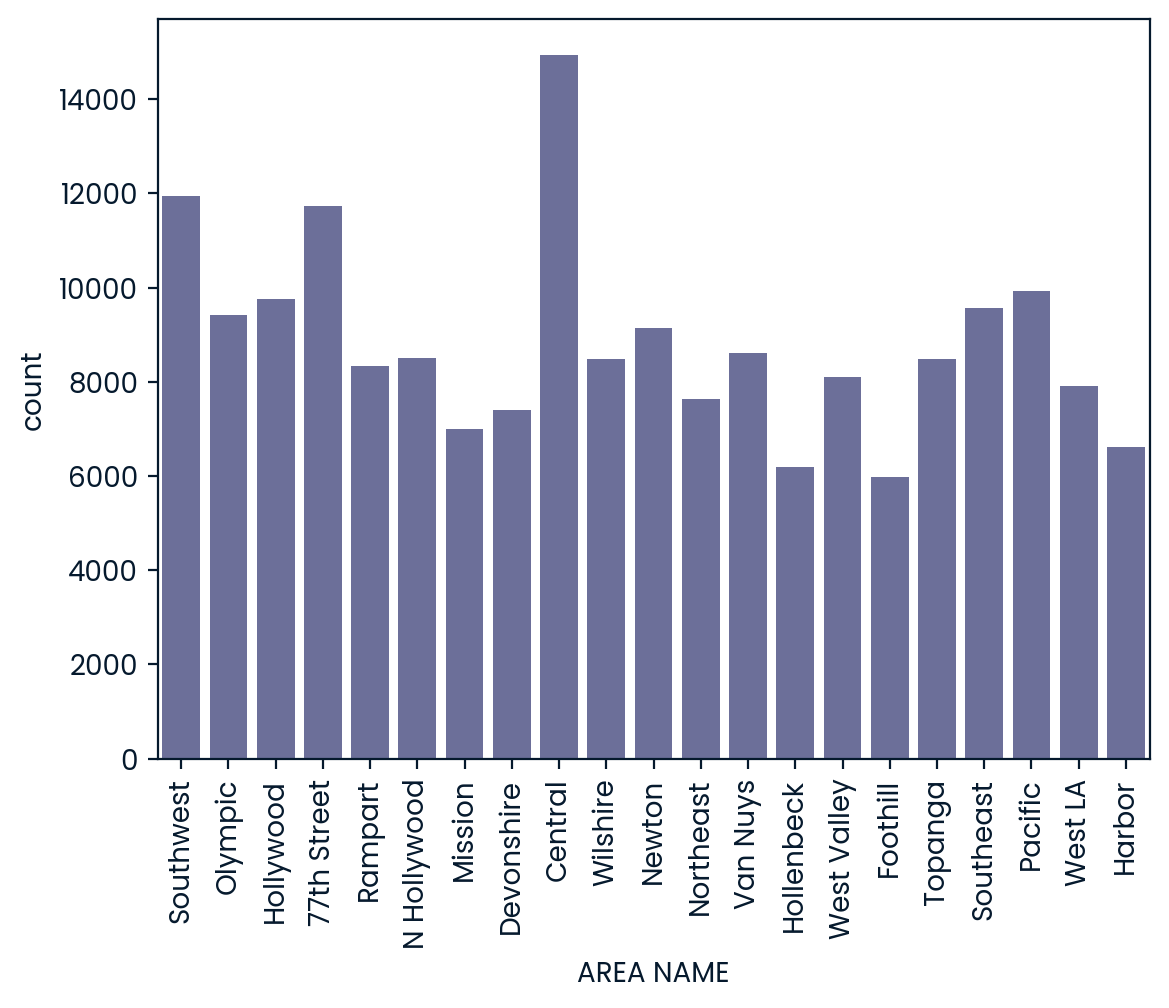

In [49]:
# Let us visualise this

sns.countplot(data = crimes, x = 'AREA NAME')

plt.xticks(rotation = 90)

plt.show()



In [50]:
print("Based on the given data, the below are the highest crime areas in Los Angeles")

crimes['AREA NAME'].value_counts().nlargest(10).index

Based on the given data, the below are the highest crime areas in Los Angeles


Index(['Central', 'Southwest', '77th Street', 'Pacific', 'Hollywood',
       'Southeast', 'Olympic', 'Newton', 'Van Nuys', 'N Hollywood'],
      dtype='object')

In [51]:
# Voluntarily we can also explore the kinds of crimes that were committed in these areas
top_areas = list(crimes['AREA NAME'].value_counts().nlargest(10).index)

top_areas_crimes = crimes[ crimes['AREA NAME'].isin(top_areas)]

committed_crimes = top_areas_crimes['Crm Cd Desc'].unique()

committed_crimes



array(['THEFT OF IDENTITY', 'BURGLARY', 'OTHER MISCELLANEOUS CRIME',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE', 'ORAL COPULATION',
       'INTIMATE PARTNER - SIMPLE ASSAULT', 'TRESPASSING',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)', 'BUNCO, GRAND THEFT',
       'BURGLARY FROM VEHICLE',
       'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'THREATENING PHONE CALLS/LETTERS',
       'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
       'VIOLATION OF COURT ORDER', 'DOCUMENT FORGERY / STOLEN FELONY',
       'CONTEMPT OF COURT', 'PICKPOCKET', 'BATTERY - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'UNAUTHORIZED COMPUTER ACCESS',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED', 'ROBBERY', 'STALK

In [52]:
# The most committed crimes in these areas

top_areas_crimes['Crm Cd Desc'].value_counts()

THEFT OF IDENTITY                                           12037
BATTERY - SIMPLE ASSAULT                                    11210
BURGLARY FROM VEHICLE                                        8503
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               8199
INTIMATE PARTNER - SIMPLE ASSAULT                            6563
                                                            ...  
GRAND THEFT / INSURANCE FRAUD                                   1
REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)        1
BIGAMY                                                          1
DISRUPT SCHOOL                                                  1
CONSPIRACY                                                      1
Name: Crm Cd Desc, Length: 99, dtype: int64

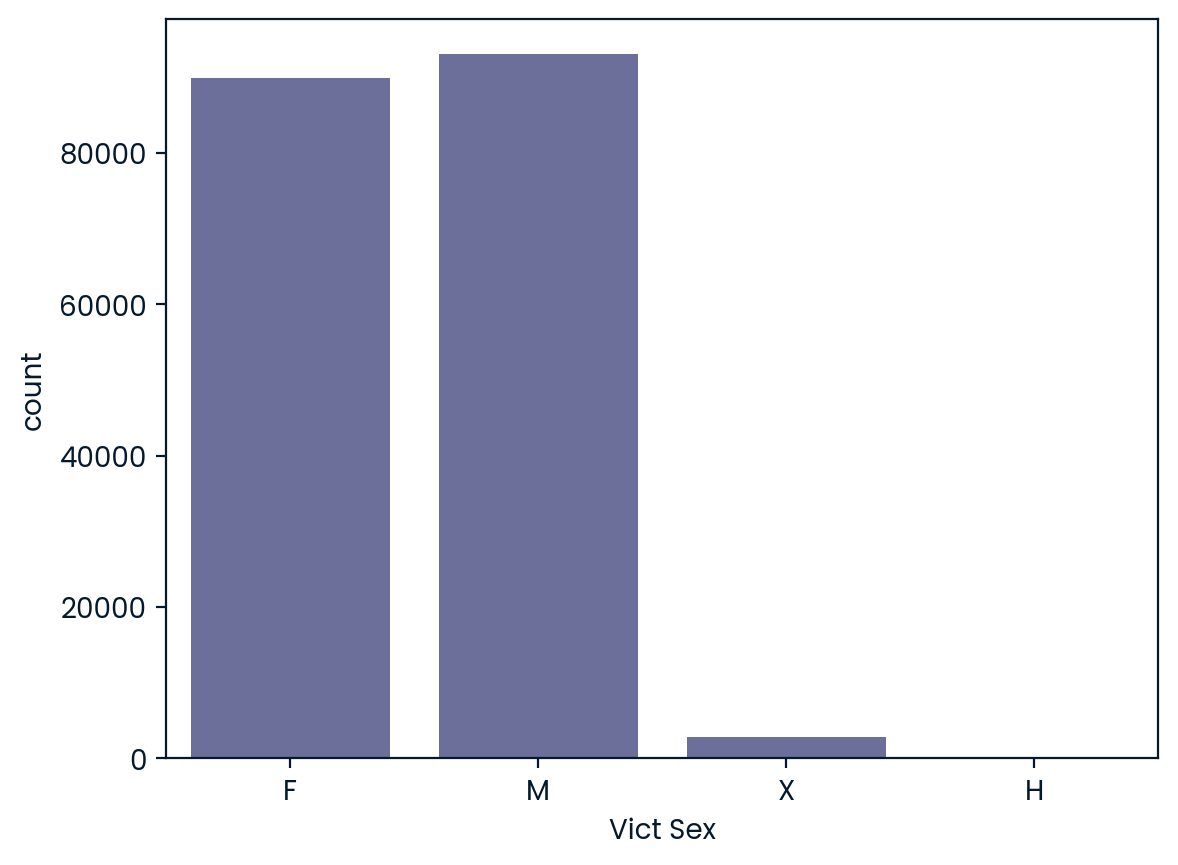

In [53]:
# Now lets see sex which is most vulnerable in these criminal activities

sns.countplot(data = crimes, x = 'Vict Sex')

plt.show()

#### Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.

In [93]:
crimes[ 'crime_time'] = crimes['TIME OCC'].str[:2]

def extract(string):
    if (string[0]=="0") and ( string[1] != "0"):
        string = string.replace(string[0], '')
        return string
    
    elif string[0] == "0" and (string[1]=="0"):
        return "0"
    
    else:
        return string
        
crimes[ 'crime_time'] = crimes['crime_time'].apply(extract)

crimes['crime_time'].unique()



array(['11', '16', '12', '6', '9', '10', '13', '0', '17', '1', '21', '7',
       '15', '5', '18', '19', '23', '14', '8', '20', '2', '22', '4', '3'],
      dtype=object)

#### Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location

In [97]:
# Extract crimes committed in the specified time interval

crimes['crime_time'] = crimes['crime_time'].astype(int)

night_crimes = crimes[ crimes['crime_time'].isin([22,23,0,1,2,3,4])]

night_crimes.head()

##################################################




,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,crime_time
8,231207476,2023-02-27,2020-08-15,0001,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV,0
10,221711184,2022-06-15,2020-05-15,0155,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV,1
30,221314362,2022-07-11,2020-04-07,0001,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL,0
33,231307252,2023-03-03,2020-07-05,2305,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY,23
36,221614254,2022-11-13,2020-01-01,0001,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV,0


In [98]:
peak_night_crime_location = night_crimes['LOCATION'].value_counts().idxmax()

peak_night_crime_location



'600 S  SPRING                       ST'

#### Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

In [87]:
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+" ]

crimes['victim_ages'] = pd.cut(crimes['Vict Age'], labels = labels, bins = (0,17,25,34,44,54,64,np.inf))



In [88]:
victim_ages = crimes['victim_ages'].value_counts()

victim_ages

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: victim_ages, dtype: int64